In [1]:
%load_ext jbmagics
import sys
sys.path.insert(0, '..')
%xmode Context
%load_ext autoreload
%autoreload 2

Exception reporting mode: Minimal
Exception reporting mode: Context


# Simple Transport Model

In [2]:
from tools.make_model import make_input, run_simulation
from tools.plotting import show_heads, show_well_head, show_concentration
from tools.base_model import make_model_data

In [12]:
model_path = 'models/mf6'
name = 'transport'

specific_model_data = {
    'model_path': model_path,
    'name': name,
    'transport': True,
    'times': (
        10.0,  # perlen (double) is the length of a stress period.
        120,   # nstp (integer) is the number of time steps in a stress period.
        1.0,   # tsmult (double) is the multiplier for the length of successive
               # time steps.
    ),
    'obs': [
        ('upper_left', (0, 1, 7)),
        ('lower_right', (0, 8, 1))
    ]
}
model_data = make_model_data(specific_model_data)

In [13]:
make_input(model_data)

In [14]:
run_simulation(model_path=model_path)

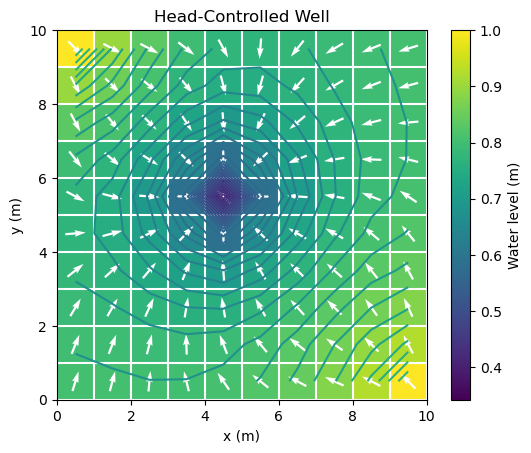

In [15]:
show_heads(model_path=model_path, name=name);

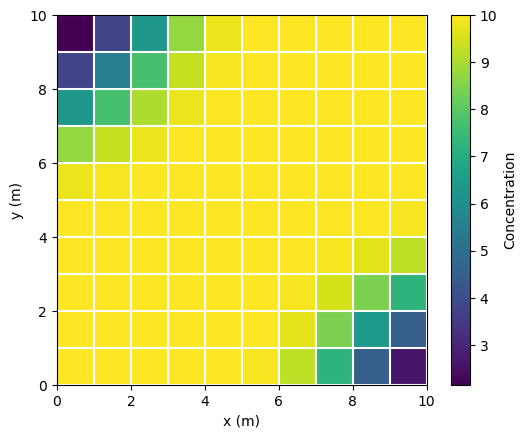

In [16]:
show_concentration(model_path=model_path, name=name);